<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/09_SCurve_ManifoldLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Manifold Learning on an S-curve

In [ ]:
import pandas as pd
import seaborn as sns

from sklearn import datasets

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Load Data

In [ ]:
def generate_s_curve(method, n = 1500):

    X, color = method( n_samples = n)

    print ("Shape of X : ", X.shape)
    print ("Shape of color : ", color.shape)
    print()
    print ("Sample X : \n")

    X = pd.DataFrame(X)
    print(X.sample(10))

    ax = plt.subplots(figsize=(12, 8))
    ax = plt.axes(projection ='3d')

    ax.scatter3D(X[0], X[1], X[2], c = color, cmap = plt.cm.RdYlBu, s=100);

    return X, color

In [ ]:
from sklearn.datasets import make_s_curve

def generate_dataset(method, **kwargs):
    return method(**kwargs)

# Generate the S-curve dataset using the generic function
X, color = generate_dataset(make_s_curve, n_samples=100, noise=0.0, random_state=42)

print(X.shape)
print(color.shape)


(100, 3)
(100,)


n_samples is the number of samples to generate.
noise is the standard deviation of Gaussian noise added to the data.
random_state is a seed for the random number generator.

In [ ]:
from sklearn.datasets import make_s_curve

# Generate an S-curve dataset
X, color = make_s_curve(n_samples=100, noise=0.0, random_state=42)
# Generate the S-curve dataset
X, color = generate_s_curve()
print(X.shape)
print(color.shape)


(100, 3)
(100,)


In [ ]:
from sklearn.datasets import make_s_curve

def generate_s_curve(n_samples=100, noise=0.0, random_state=42):
    return make_s_curve(n_samples=n_samples, noise=noise, random_state=random_state)

# Generate the S-curve dataset
X, color = generate_s_curve()

print(X.shape)
print(color.shape)


(100, 3)
(100,)


## Manifold Learning

In [ ]:
def apply_manifold_learning(X, method):

    X = method.fit_transform(X)

    print ("New shape of X : ", X.shape)
    print()
    print ("Sample X : \n")

    X = pd.DataFrame(X)
    print(X.sample(10))

    plt.subplots(figsize = (12, 10))
    plt.axis('equal');

    plt.scatter(X[0], X[1], c = color, cmap = plt.cm.RdYlBu)
    plt.xlabel('X[0]')
    plt.ylabel('X[1]');

    return method

### Apply MDS
* n_components : Number of dimensions in which to immerse the dissimilarities.
* metric : If True, perform metric MDS; otherwise, perform nonmetric MDS.
* embedding_ :Stores the position of the dataset in the embedding space.
* stress_ : The final value of the stress (sum of squared distance of the disparities and the distances for all constrained points).

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


New shape of X :  (100, 2)

Sample X : 

           0         1
64  0.510638 -0.498681
21  0.468798 -0.051639
98  0.268775  0.632582
19  0.027743 -0.338301
78 -0.001772 -0.017953
74 -0.526866 -0.363645
18  0.386866  0.256467
16 -0.059027 -0.317529
12 -0.531128  0.010354
9   0.363903  0.157505


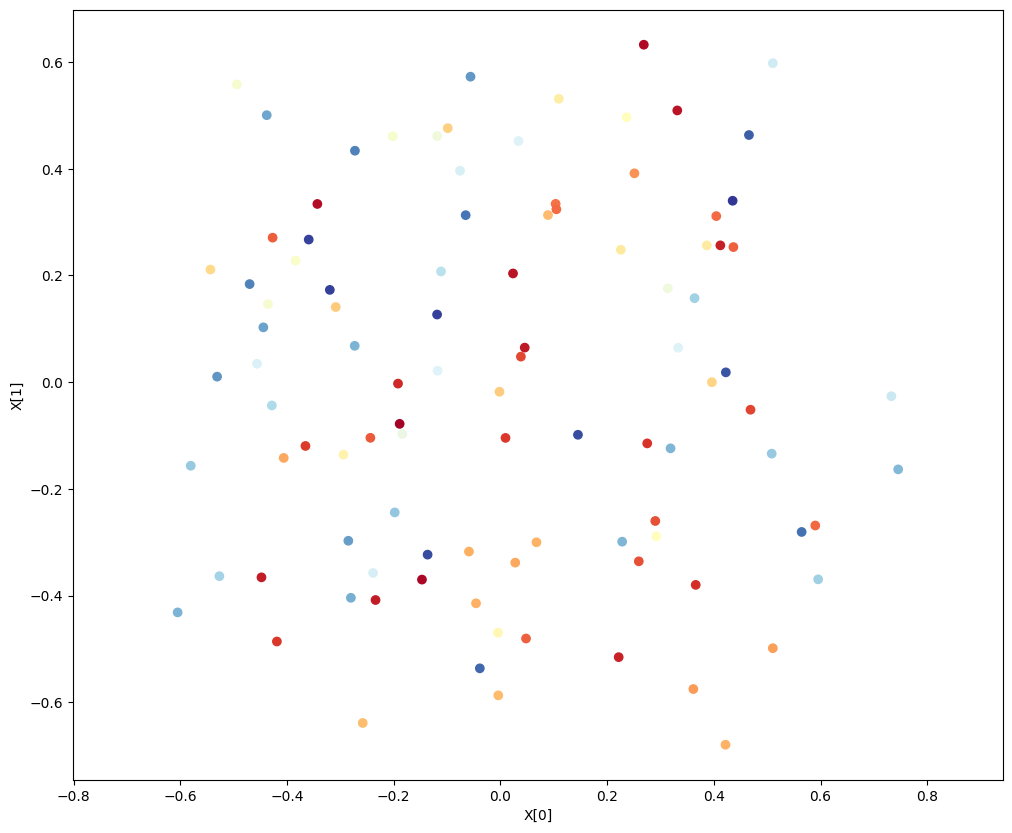

In [ ]:
from sklearn.manifold import MDS

mds = apply_manifold_learning(X, MDS(n_components = 2, metric = False))

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


New shape of X :  (100, 2)

Sample X : 

           0         1
49 -0.303345 -1.843297
38  1.053337  1.220523
94  0.701145  1.937405
51  0.712296  2.017761
42  0.767975 -1.227787
4  -0.216869 -2.087603
75  1.037937  1.657584
1  -0.834703  1.653157
19 -1.027044 -1.172154
78 -1.412978 -0.518567


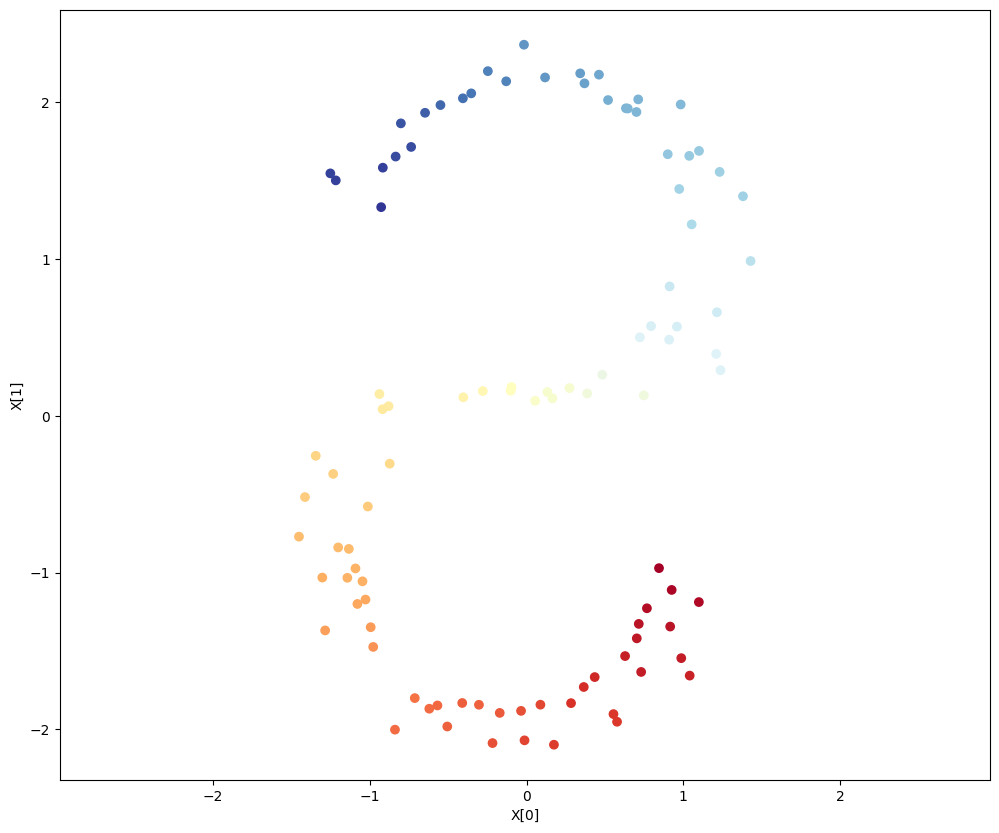

In [ ]:
mds = apply_manifold_learning(X, MDS(n_components = 2, metric = True))

### Apply Spectral Embedding
* n_components : The dimension of the projected subspace.
* random_state : A pseudo random number generator used for the initialization of the lobpcg eigenvectors.
* eigen_solver : None, ‘arpack’, ‘lobpcg’, or ‘amg’
    * The eigenvalue decomposition strategy to use.
    
* embedding_ : Spectral embedding of the training matrix.

* affinity_matrix_ : Affinity_matrix constructed from samples or precomputed.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html

New shape of X :  (100, 2)

Sample X : 

           0         1
69 -0.045264 -0.045835
58  0.045628 -0.033205
20 -0.016657  0.033002
85  0.013464  0.043372
94 -0.036516 -0.013630
45 -0.024764  0.017341
52 -0.045147 -0.045342
68  0.043898 -0.028243
55 -0.045035 -0.044902
42  0.046376 -0.035386


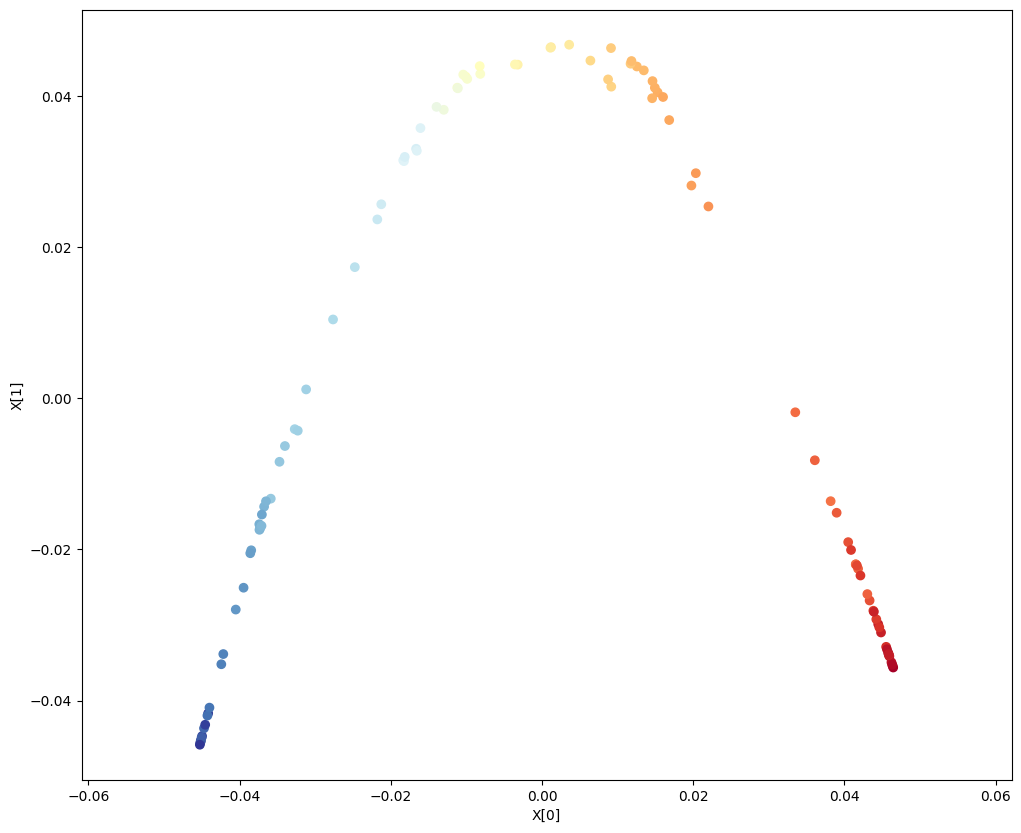

In [43]:
from sklearn.manifold import SpectralEmbedding

spectral_em = apply_manifold_learning(X, \
        SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"))

### Apply TSNE
* n_components : Dimension of the embedded space.
* init : Initialization of embedding. Possible options are ‘random’, ‘pca’, and a numpy array of shape (n_samples, n_components). PCA initialization cannot be used with precomputed distances and is usually more globally stable than random initialization.
* random_state : If int, random_state is the seed used by the random number generator
* embedding_ : Stores the embedding vectors.
* kl_divergence_ : Kullback-Leibler divergence after optimization.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

New shape of X :  (100, 2)

Sample X : 

            0         1
69   6.276365  4.847183
42 -10.573152 -0.874671
43   5.517200  5.640818
56  -9.594999 -1.250819
41  -1.780359  3.847411
10 -10.898254 -0.168103
51   3.183620  4.724507
76   3.172583  6.208838
84  -5.001324 -0.313693
92   2.981745  6.761953


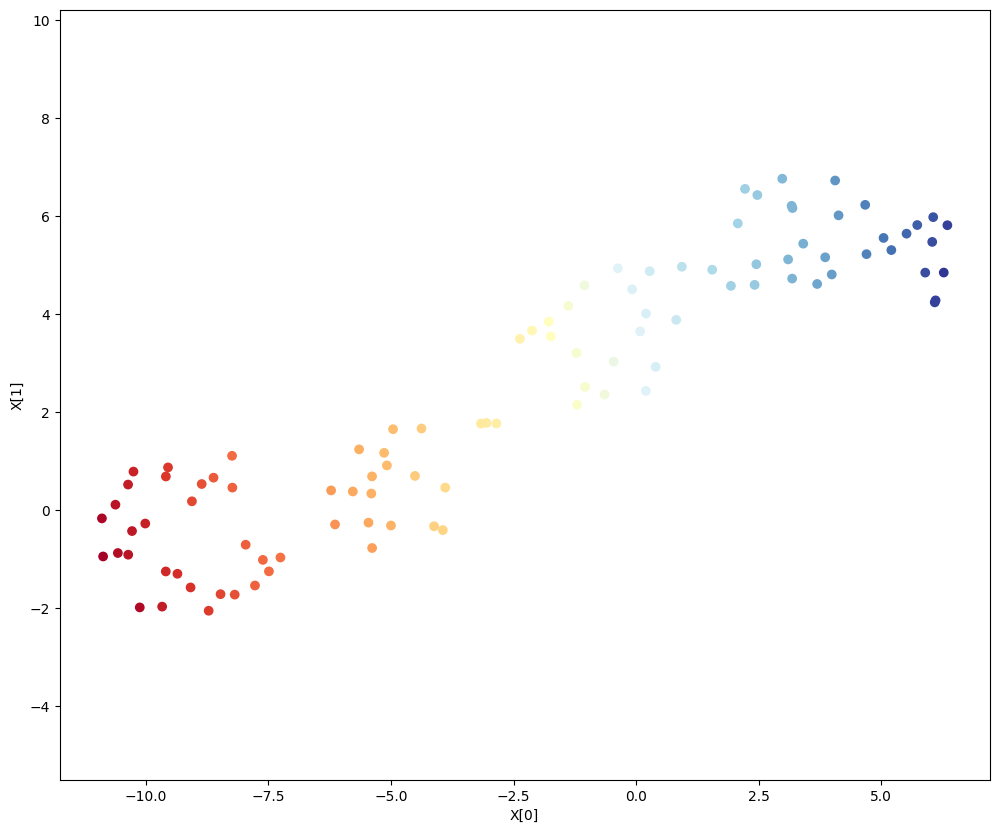

In [44]:
from sklearn.manifold import TSNE

tsne = apply_manifold_learning(X, TSNE(n_components = 2, init = 'pca', random_state = 0))

### Apply Isomap

* n_neighbors : number of neighbors to consider for each point.

* n_components : number of coordinates for the manifold
* embedding_ : Stores the embedding vectors.

* dist_matrix_ : Stores the geodesic distance matrix of training data.

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html

New shape of X :  (100, 2)

Sample X : 

           0         1
28 -1.347756 -1.608178
39 -0.134006  0.472680
59  0.956304  0.393640
89 -0.359213 -0.618981
62 -3.036885  0.919298
78  0.590656  0.586984
70 -3.193376  0.048821
99  2.901039  0.497946
66  2.672252 -0.271405
97 -0.052248  0.506665


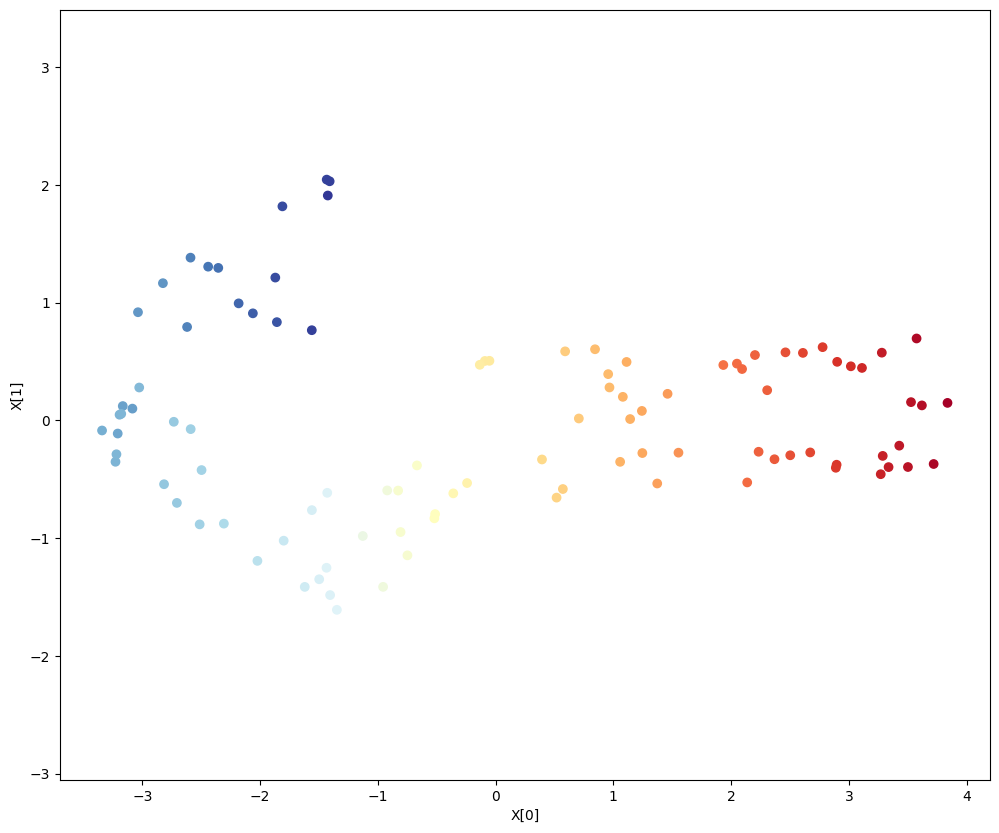

In [45]:
from sklearn.manifold import Isomap

isomap = apply_manifold_learning(X, Isomap(n_neighbors = 15, n_components = 2))

### Apply LLE
* n_neighbors :number of neighbors to consider for each point.

* n_components : number of coordinates for the manifold
* method : ‘standard’, ‘hessian’, ‘modified’ or ‘ltsa’
    * standard : use the standard locally linear embedding algorithm.

    * hessian : use the Hessian eigenmap method. This method requires n_neighbors > n_components * (1 + (n_components + 1) / 2

    * modified : use the modified locally linear embedding algorithm.
    * ltsa : use local tangent space alignment algorithm
* embedding_ : Stores the embedding vectors

* reconstruction_error_ : Reconstruction error associated with embedding_

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html

New shape of X :  (100, 2)

Sample X : 

           0         1
23  0.061899 -0.087288
2   0.033631  0.158603
41  0.058299  0.004545
54  0.065000  0.026389
60  0.074212 -0.095743
66 -0.103699 -0.064297
45  0.028825  0.158442
0   0.060692 -0.074746
61  0.041402 -0.156146
3   0.051369  0.068395


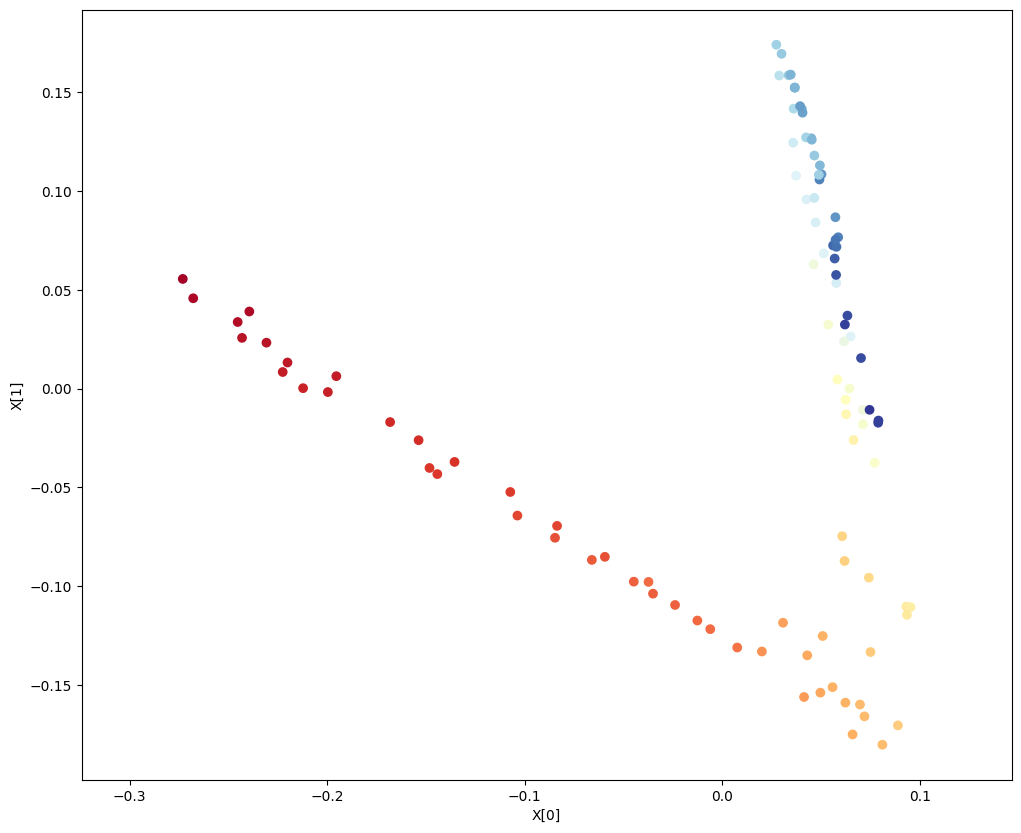

In [46]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(X, \
        LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'standard') )

### Apply HLLE

* embedding_ : Stores the embedding vectors

* reconstruction_error_ : Reconstruction error associated with embedding_

New shape of X :  (100, 2)

Sample X : 

           0         1
14  0.097815 -0.067209
75 -0.104729  0.098606
28 -0.078439  0.139720
67 -0.107263  0.095020
46  0.027812 -0.057987
39 -0.031473 -0.169866
72  0.196970  0.035951
94 -0.105662  0.056250
65 -0.064181 -0.108942
91 -0.093916 -0.091993


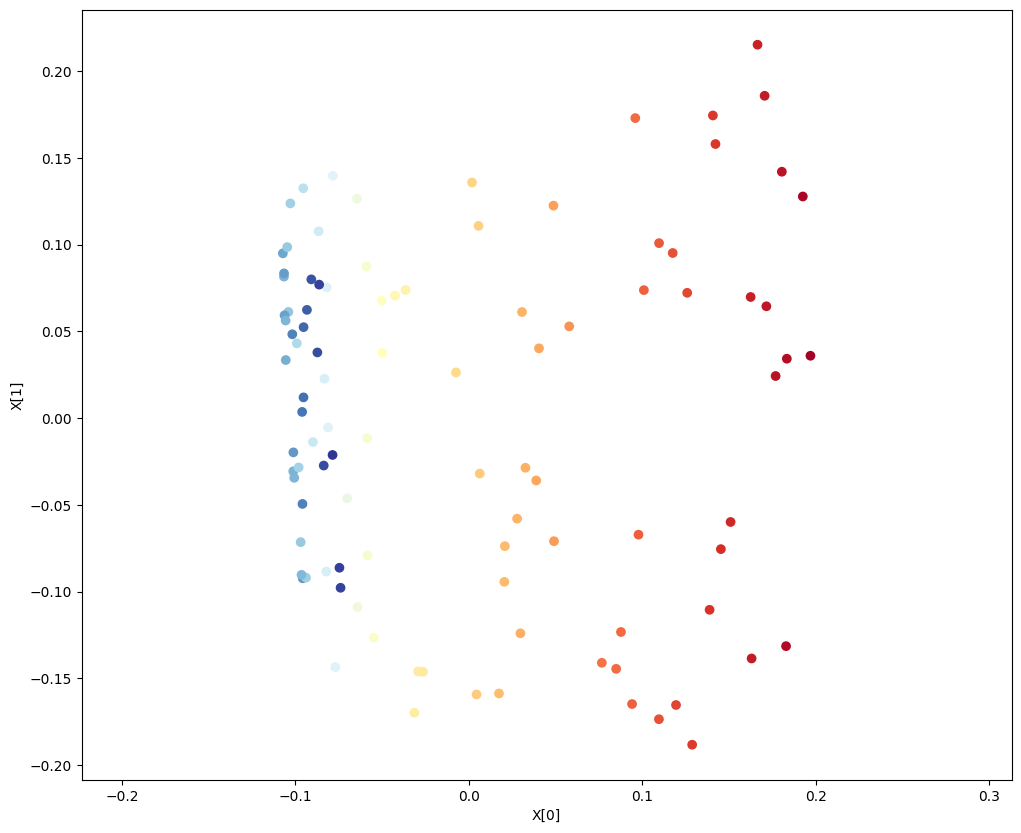

In [47]:
hlle = apply_manifold_learning(X,
            LocallyLinearEmbedding(n_neighbors = 15, n_components = 2, method = 'hessian'))